In [108]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.inspection import permutation_importance

warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
pd.set_option('display.max_columns', 500)

In [109]:
features = pd.read_csv('./data/features_dummified_213col.csv', index_col=0)
target = pd.read_csv('./data/Ames_Housing_Price_Data.csv')['SalePrice']

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=44)

In [4]:
X_train

,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,PavedDrive,Fence,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,crime_rate,school_quality,HouseAge,LastRemod
LotShape,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,3,5,8,2,3,2,3,1,5,0,0,1,0,2,1,3,8,0,0,0,3,0,864,56,4060,1922,1950,0,0,0,864,864,0,0,0,96,0,0,0,0,7,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [5]:
X_test

,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,PavedDrive,Fence,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,crime_rate,school_quality,HouseAge,LastRemod
LotShape,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,3,9,5,4,3,5,3,1,5,1,0,2,0,3,1,5,8,4,3,3,3,0,1808,102,13514,2008,2008,285,1142,0,632,1774,0,850,200,26,0,0,0,0,3,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [6]:
precious_train = X_train[['OverallQual', 'ExterQual', 'BsmtQual', 'BsmtExposure', 
                             'KitchenQual', 'FireplaceQu', 'GarageFinish', 
                             'GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 
                              'GarageArea', 'Neighborhood_NridgHt', 'Foundation_PConc', 
                             'SaleCondition_Partial', 'LastRemod',
                              'FullBath','HalfBath','BedroomAbvGr']].copy()


precious_test = X_test[['OverallQual', 'ExterQual', 'BsmtQual', 'BsmtExposure', 
                             'KitchenQual', 'FireplaceQu', 'GarageFinish', 
                             'GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 
                              'GarageArea', 'Neighborhood_NridgHt', 'Foundation_PConc', 
                             'SaleCondition_Partial', 'LastRemod',
                              'FullBath','HalfBath','BedroomAbvGr']].copy()
else_train = X_train.drop(columns = precious_train.columns).copy()
else_test = X_test.drop(columns = precious_test.columns).copy()

In [7]:
else_test.shape

(774, 192)

In [8]:
def grid_fit(model, params, cv):
    
    grid = GridSearchCV(model, params, cv=cv, return_train_score = True)
    ans = grid.fit(X_train, Y_train)
    model = ans.best_estimator_
    return model.fit(X_train, Y_train)

In [9]:
else_train.shape

(1806, 192)

In [10]:
lm = LinearRegression()
logis = LogisticRegression()
lasso = Lasso(normalize=True)
ridge = Ridge()
enet = ElasticNet()

In [11]:
len(features.columns)

212

In [111]:
params = {'alpha': np.logspace(1e-5, 20, 20),
          'normalize': [True, False]}

In [12]:
i=190
ls = []
Xtrain_list = []
Xtest_list = []

while i>0:
    X_train = pd.concat([precious_train, else_train], axis=1).reset_index()
    grid = GridSearchCV(Lasso(), params, cv=10)
    ls.append(grid.fit(X_train, Y_train).best_estimator_)

    Xtrain_list.append(X_train)
    Xtest_list.append(pd.concat([precious_test, else_test], axis=1).reset_index())
    
    else_test = else_test.drop(columns = else_train.columns[0])
    else_train = else_train.drop(columns = else_train.columns[0])

    i = i-1

In [13]:
else_train.columns[0]

'school_quality'

In [14]:
ls

[Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292, normalize=False),
 Lasso(alpha=127.43012386851292

In [57]:
Xtest_list[1]

,LotShape,OverallQual,ExterQual,BsmtQual,BsmtExposure,KitchenQual,FireplaceQu,GarageFinish,GrLivArea,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GarageArea,Neighborhood_NridgHt,Foundation_PConc,SaleCondition_Partial,LastRemod,FullBath,HalfBath,BedroomAbvGr,OverallCond,ExterCond,BsmtCond,HeatingQC,BsmtFullBath,BsmtHalfBath,KitchenAbvGr,Functional,GarageQual,PavedDrive,Fence,LotFrontage,YearBuilt,YearRemodAdd,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,crime_rate,school_quality,HouseAge
0,3,9,4,5,1,5,4,3,1808,13514,285,1142,1774,850,1,1,0,1,2,0,3,5,3,3,5,1,0,1,8,3,3,0,102,2008,2008,0,632,0,200,26,0,0,0,0,3,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,10,1
1,3,7,3,4,1,4,4,3,2840,12511,168,988,1420,1314,0,1,0,30,2,1,4,7,3,3,5,0,1,1,6,3,3,3,0,1978,1978,0,432,1420,0,16,0,0,208,0,12,2008,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [58]:
df = pd.DataFrame(columns=['R-sq', 'Num_of_feat'])
for i in range(0,190):
    df=df.append({'R-sq':ls[i].score(Xtest_list[i], Y_test), 'Num_of_feat': 212-i}, ignore_index=True)

In [59]:
df

,R-sq,Num_of_feat
0,0.913358,212.0
1,0.913358,211.0
2,0.910373,210.0
3,0.91015,209.0
4,0.910033,208.0
...,...,...
185,0.887901,27.0
186,0.887373,26.0
187,0.887188,25.0
188,0.887321,24.0


<AxesSubplot:xlabel='Num_of_feat', ylabel='R-sq'>

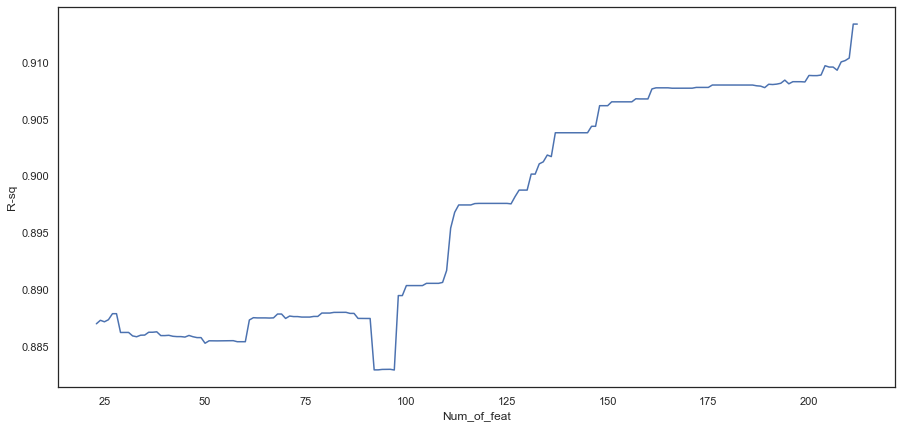

In [60]:
sns.lineplot(x=df['Num_of_feat'], y=df['R-sq'])

In [62]:
grid.feature_importance_

AttributeError: 'GridSearchCV' object has no attribute 'feature_importance_'

In [69]:
# Fits the explainer
explainer = shap.Explainer(ls[1], Xtrain_list[1])
# Calculates the SHAP values - It takes some time
shap_values = explainer(Xtrain_list[1])

In [70]:
shap_values = explainer.shap_values(Xtest_list[1])

In [72]:
X_test

,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,PavedDrive,Fence,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,crime_rate,school_quality,HouseAge,LastRemod
LotShape,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,3,9,5,4,3,5,3,1,5,1,0,2,0,3,1,5,8,4,3,3,3,0,1808,102,13514,2008,2008,285,1142,0,632,1774,0,850,200,26,0,0,0,0,3,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [80]:
j=1
# perform permutation importance
results = permutation_importance(ls[j], Xtest_list[j], Y_test, scoring='neg_mean_squared_error')
# get importance
sorted_idx = results.importances_mean.argsort()

feature_rank = {}
features = np.array(Xtest_list[j].columns.values)
# summarize feature importance
for i in sorted_idx[::-1]:
    data = {features[i]: results.importances_mean[i]}
    feature_rank.update(data)

array(['LotShape', 'OverallQual', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GrLivArea',
       'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageArea',
       'Neighborhood_NridgHt', 'Foundation_PConc',
       'SaleCondition_Partial', 'LastRemod', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'OverallCond', 'ExterCond', 'BsmtCond',
       'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr',
       'Functional', 'GarageQual', 'PavedDrive', 'Fence', 'LotFrontage',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'MSSubClass_30',
       'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_150',
       'MSSubClass_160', 'MSSubClass_1

In [112]:
feat_list = []
j = 0
Xtest_list = []
Xtest_list.append(X_test)
Xtrain_list = []
Xtrain_list.append(X_train)
ls=[]


while j < 212:
    results = permutation_importance(Lasso().fit(Xtrain_list[j], Y_train), 
                                     Xtest_list[j], 
                                     Y_test, 
                                     scoring='neg_mean_squared_error')
    # get importance
    sorted_idx = results.importances_mean.argsort()

    feature_rank = {}
    features = np.array(Xtest_list[j].columns.values)
    feat_list.append(features)
    # summarize feature importance
    for i in sorted_idx[::-1]:
        data = {features[i]: results.importances_mean[i]}
        feature_rank.update(data)
    
    last_feat = list(feature_rank)[-1]
    del feature_rank[last_feat]
    ls.append(grid.fit(Xtrain_list[j], Y_train).best_estimator_)
    Xtest_list.append(X_test[list(feature_rank)])
    Xtrain_list.append(X_train[list(feature_rank)])
    
    j = j+1

In [113]:
Xtrain_list[0]

,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,PavedDrive,Fence,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,crime_rate,school_quality,HouseAge,LastRemod
LotShape,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,3,5,8,2,3,2,3,1,5,0,0,1,0,2,1,3,8,0,0,0,3,0,864,56,4060,1922,1950,0,0,0,864,864,0,0,0,96,0,0,0,0,7,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [101]:
last_feat = list(feature_rank)[-1]
del feature_rank[last_feat]

In [102]:
feature_rank

{'GrLivArea': 1690548742.6085775,
 'OverallQual': 375422984.8925128,
 'BsmtFinSF1': 237835977.31266657,
 'YearBuilt': 141776637.72103944,
 'MasVnrArea': 90286935.07564326,
 'GarageArea': 70373160.84268436,
 'OverallCond': 67010775.28472614,
 'TotalBsmtSF': 64583850.906080484,
 'ExterQual': 47896164.91553257,
 'KitchenQual': 35994281.136636496,
 'crime_rate': 35177837.47264811,
 'Neighborhood_NridgHt': 32854988.924598873,
 'Neighborhood_StoneBr': 25361441.89014119,
 'LotArea': 22716278.410069108,
 'BedroomAbvGr': 22645925.723169196,
 'BldgType_Twnhs': 21341069.2319381,
 'BldgType_TwnhsE': 20847536.372721005,
 'BsmtCond': 17304569.96340239,
 'FireplaceQu': 15981068.914321136,
 'Functional': 13892939.122712756,
 'Neighborhood_NoRidge': 13335702.533762705,
 'BsmtFinSF2': 12995603.893893361,
 'school_quality': 12871027.201327492,
 'Neighborhood_Crawfor': 12805957.66760422,
 'SaleCondition_Partial': 12743864.980808485,
 'BsmtExposure': 12720785.345549548,
 'ScreenPorch': 12623228.560616756,


In [103]:
list(feature_rank)

['GrLivArea',
 'OverallQual',
 'BsmtFinSF1',
 'YearBuilt',
 'MasVnrArea',
 'GarageArea',
 'OverallCond',
 'TotalBsmtSF',
 'ExterQual',
 'KitchenQual',
 'crime_rate',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'LotArea',
 'BedroomAbvGr',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond',
 'FireplaceQu',
 'Functional',
 'Neighborhood_NoRidge',
 'BsmtFinSF2',
 'school_quality',
 'Neighborhood_Crawfor',
 'SaleCondition_Partial',
 'BsmtExposure',
 'ScreenPorch',
 'KitchenAbvGr',
 'MSSubClass_120',
 'BsmtQual',
 'LandContour_HLS',
 'MasVnrType_BrkFace',
 'HeatingQC',
 'WoodDeckSF',
 '2ndFlrSF',
 'LotFrontage',
 'Foundation_PConc',
 'Exterior1st_BrkFace',
 'LotConfig_CulDSac',
 'Neighborhood_Gilbert',
 'Condition1_Feedr',
 'GarageQual',
 'MSSubClass_160',
 'BsmtUnfSF',
 'Neighborhood_SawyerW',
 'Neighborhood_BrkSide',
 'HalfBath',
 'Exterior1st_HdBoard',
 'Condition1_Artery',
 'Neighborhood_NWAmes',
 'RoofStyle_Hip',
 'LastRemod',
 'EnclosedPorch',
 'SaleCondition_Abnorml',
 'PavedDr

In [116]:
df = pd.DataFrame(columns=['R-sq', 'Num_of_feat'])
for i in range(0,212):
    df=df.append({'R-sq':ls[i].score(Xtest_list[i], Y_test), 'Num_of_feat': 212-i}, ignore_index=True)

In [117]:
df

,R-sq,Num_of_feat
0,0.913345,212.0
1,0.913352,211.0
2,0.913357,210.0
3,0.914012,209.0
4,0.914013,208.0
...,...,...
207,0.833486,5.0
208,0.833665,4.0
209,0.809994,3.0
210,0.745628,2.0


In [131]:
df1 = df[df['Num_of_feat']<100]

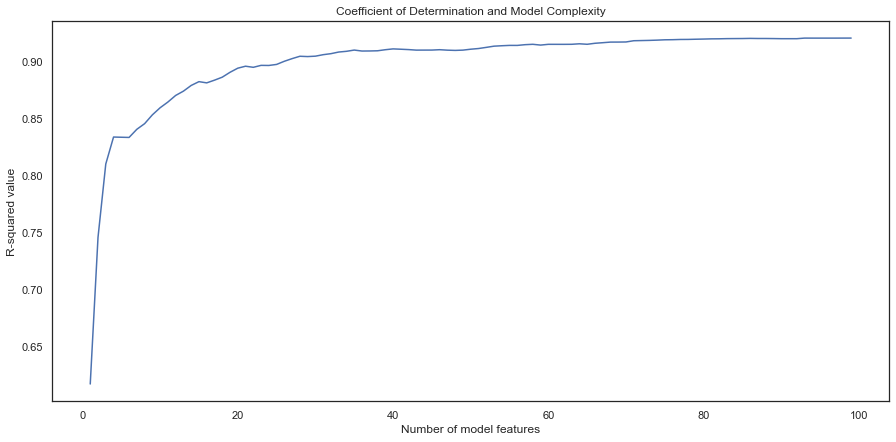

In [150]:
plot1 = sns.lineplot(x=df1['Num_of_feat'], 
                     y=df1['R-sq']).set(
                                    title='Coefficient of Determination and Model Complexity',
                                    xlabel = 'Number of model features',
                                    ylabel = 'R-squared value')

In [155]:
plt.show()

In [151]:
figure = plot1.get_figure()    
figure.savefig('lasso_feat_imp.png', dpi=400)

AttributeError: 'list' object has no attribute 'get_figure'

In [152]:
plt.tight_layout()
plt.savefig("a.jpg")

<Figure size 1080x504 with 0 Axes>

In [138]:
Models = []
Models.append(ls)
Models.append(Xtest_list)
Models.append(Xtrain_list)

import pickle

In [139]:
filename = 'lassomodels.sav'
pickle.dump(Models, open(filename, 'wb'))

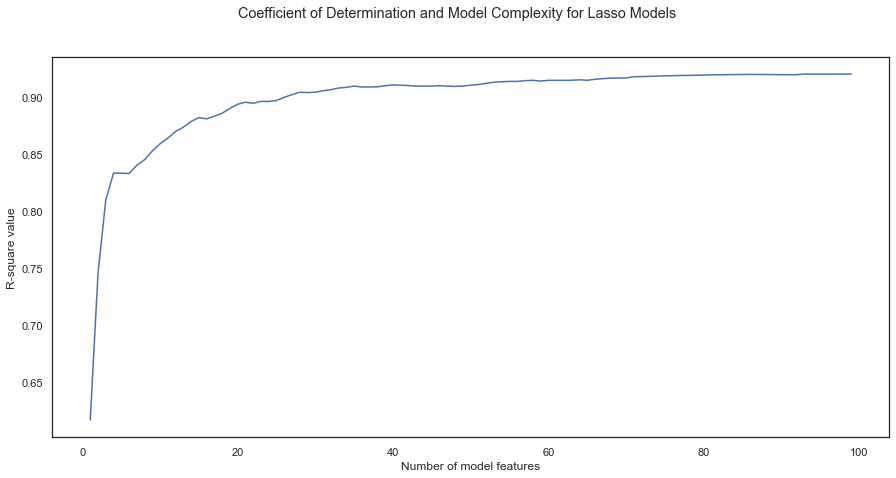

In [164]:
fig = plt.figure()
plt.plot(df1['Num_of_feat'], df1['R-sq'])
fig.suptitle('Coefficient of Determination and Model Complexity for Lasso Models')
plt.xlabel('Number of model features')
plt.ylabel('R-square value')
fig.savefig('lasso_feat_imp.png')